In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
data.shape

(299, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.size

3887

In [8]:
percent_missing =data.isnull().sum()                   # this show what percentage value misssing in dataset

total_cells = np.product(data.shape)
total_missing = percent_missing.sum()

percent_missing = (total_missing/total_cells) * 100
print(percent_missing)                                      # there is no null value

0.0


In [9]:
# summary statistics
# .T is a method that transposes the rows and columns of the DataFrame, turning the columns into rows and the rows into columns

data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                                    .background_gradient(subset=['std'], cmap='Reds')\
                                    .background_gradient(subset=['75%'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
age,299.000000,60.833893,11.894809,40.000000,51.000000,60.000000,70.000000,95.000000
anaemia,299.000000,0.431438,0.496107,0.000000,0.000000,0.000000,1.000000,1.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
diabetes,299.000000,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
high_blood_pressure,299.000000,0.351171,0.478136,0.000000,0.000000,0.000000,1.000000,1.000000
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
sex,299.000000,0.648829,0.478136,0.000000,0.000000,1.000000,1.000000,1.000000


In [10]:
features = [feature for feature in data.columns if feature != 'DEATH_EVENT']
features

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

# Visualization

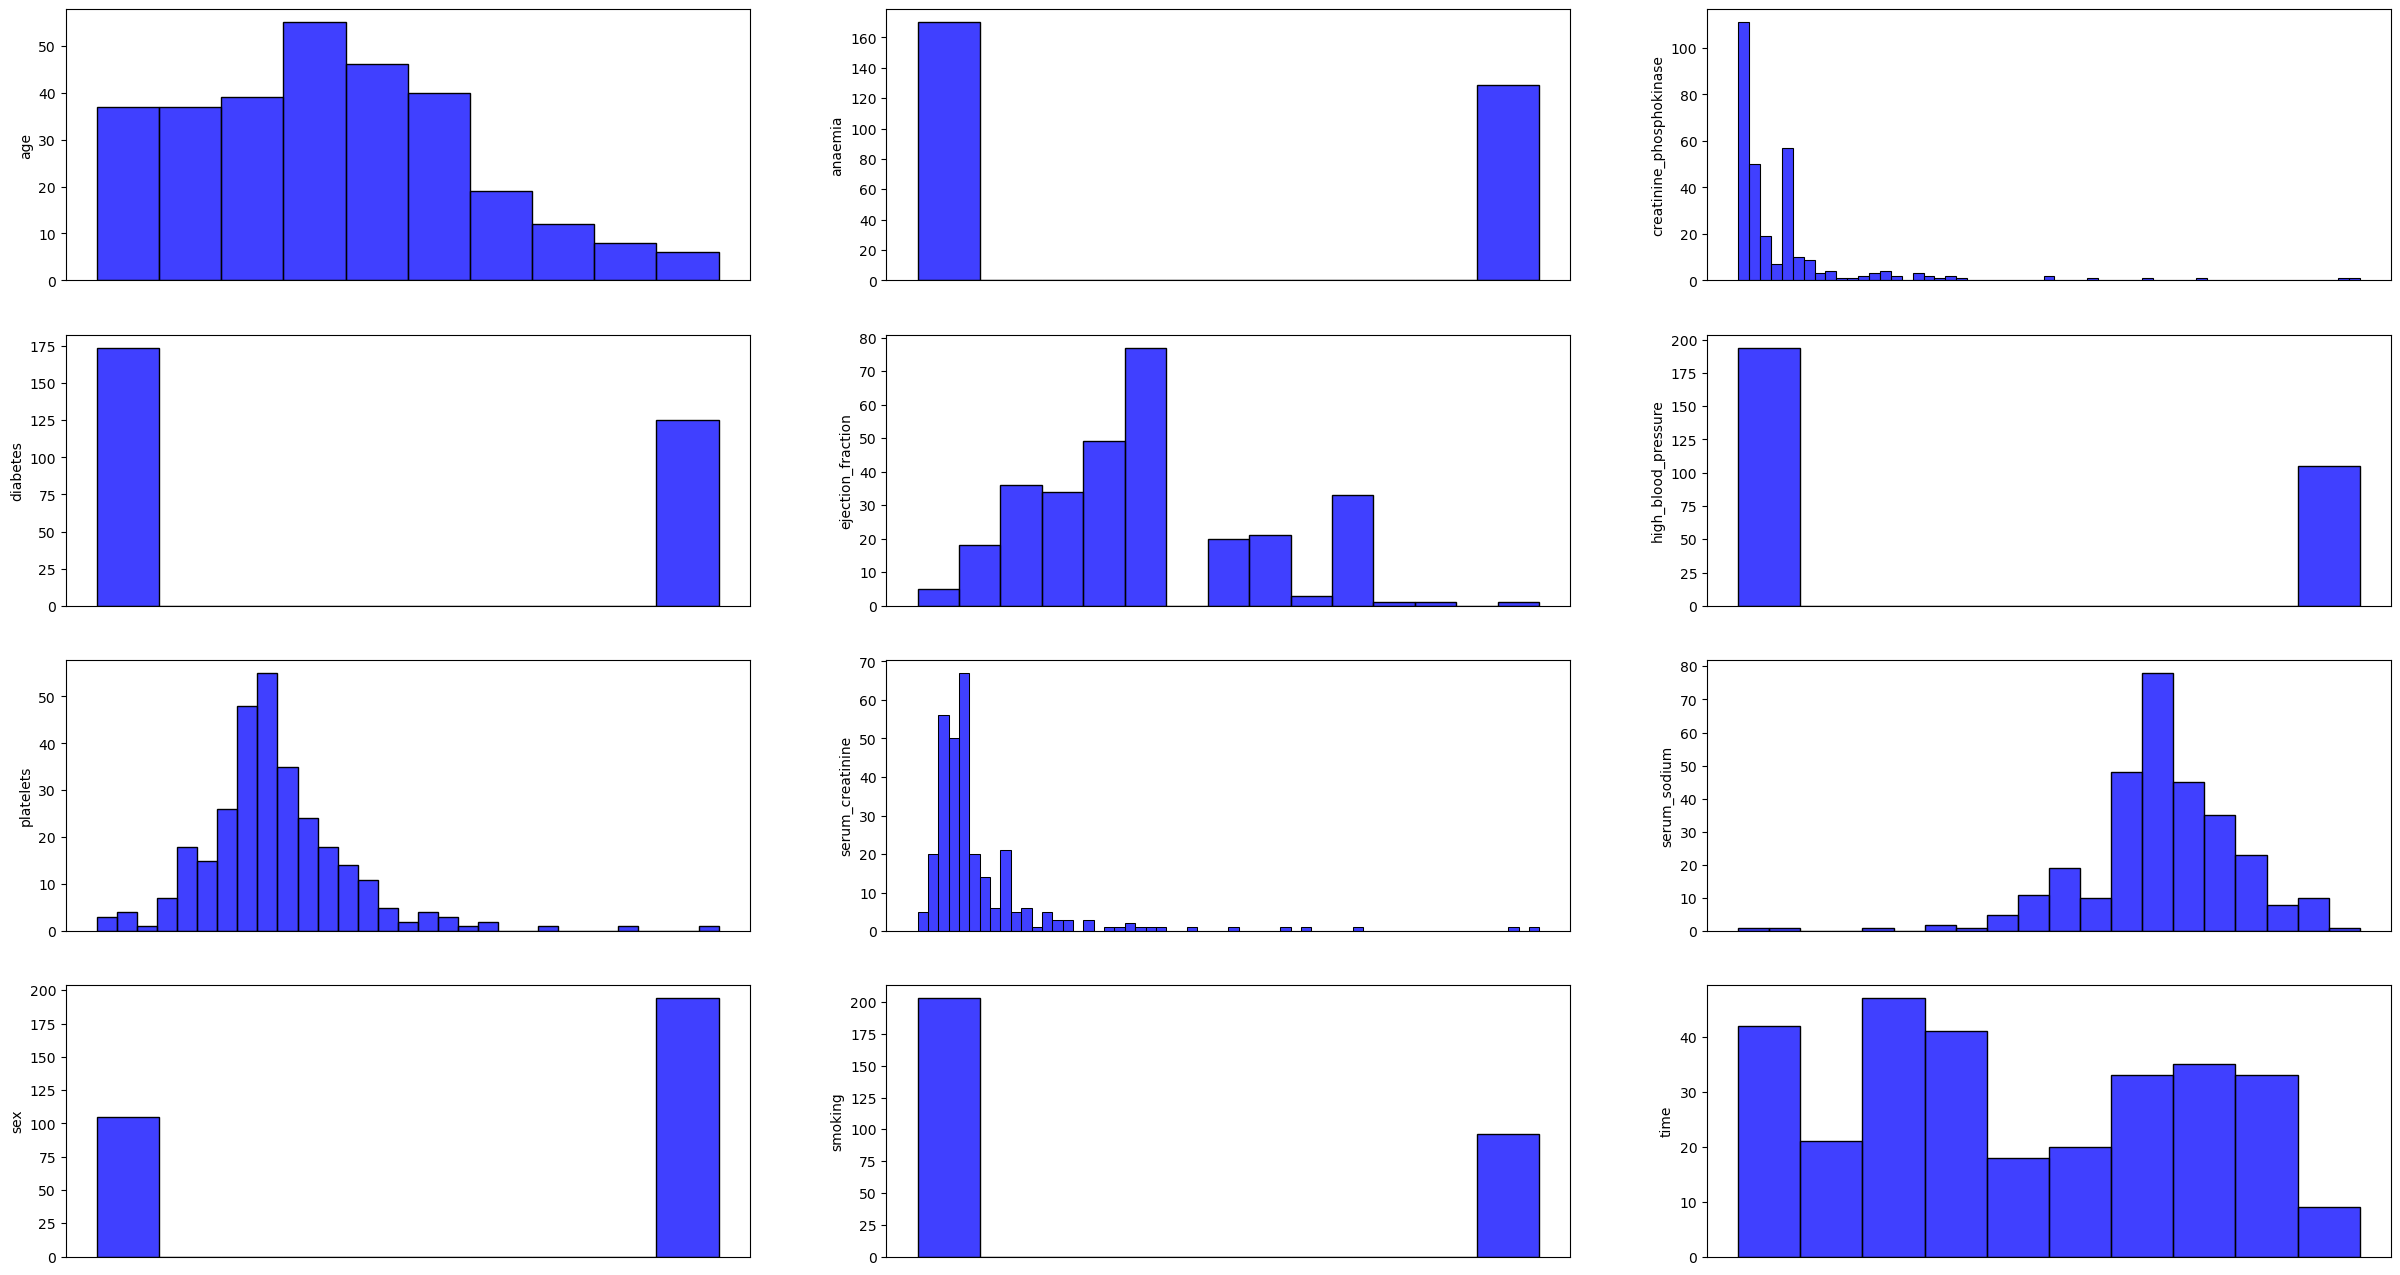

In [11]:
plt.figure(figsize=(30,50))
for i , feature in enumerate(features):
    plt.subplot(12,3, i*1+1)
    plt.ylabel(feature)
    subplot = sns.histplot(data[feature], color="Blue", kde_kws={'shade': True})
    subplot.set(xlabel=None)                        # removes the x-label of the histogram plot.
    subplot.set(xticklabels=[])                     # removes the tick labels on the x-axis.
    subplot.tick_params(bottom=False)               # removes the ticks on the bottom of the plot.
plt.show()   

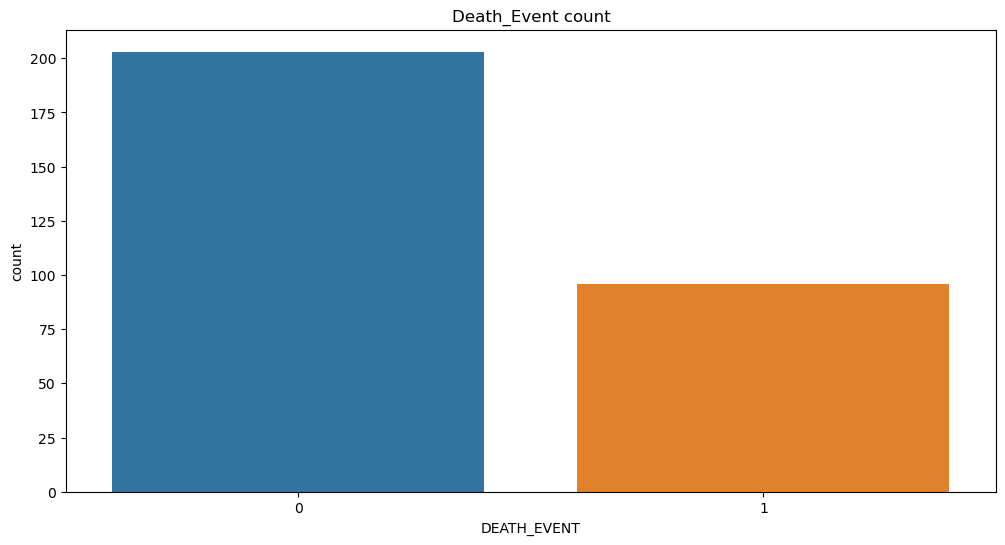

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data= data, x="DEATH_EVENT")
plt.title("Death_Event count")
plt.show()

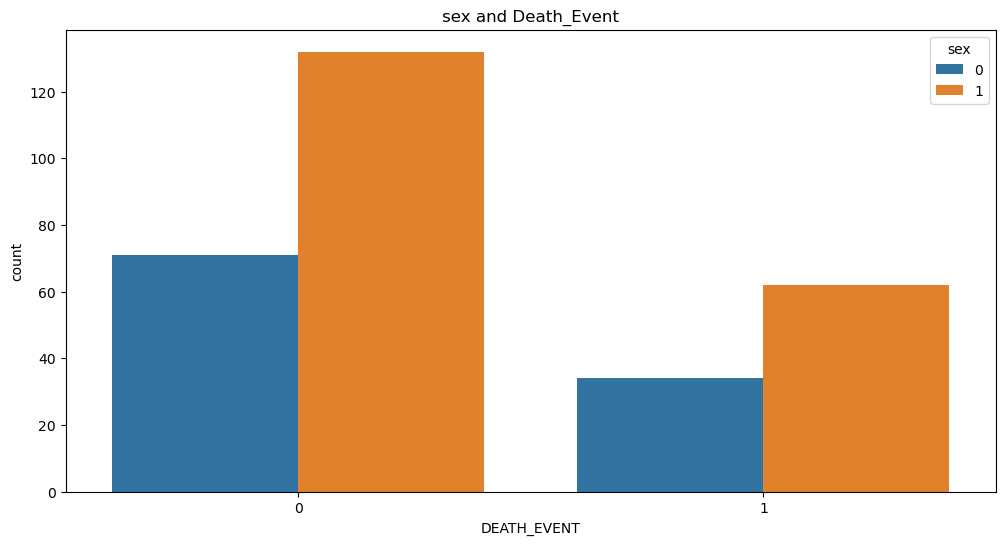

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(data= data, x="DEATH_EVENT", hue="sex")
plt.title("sex and Death_Event")
plt.show()

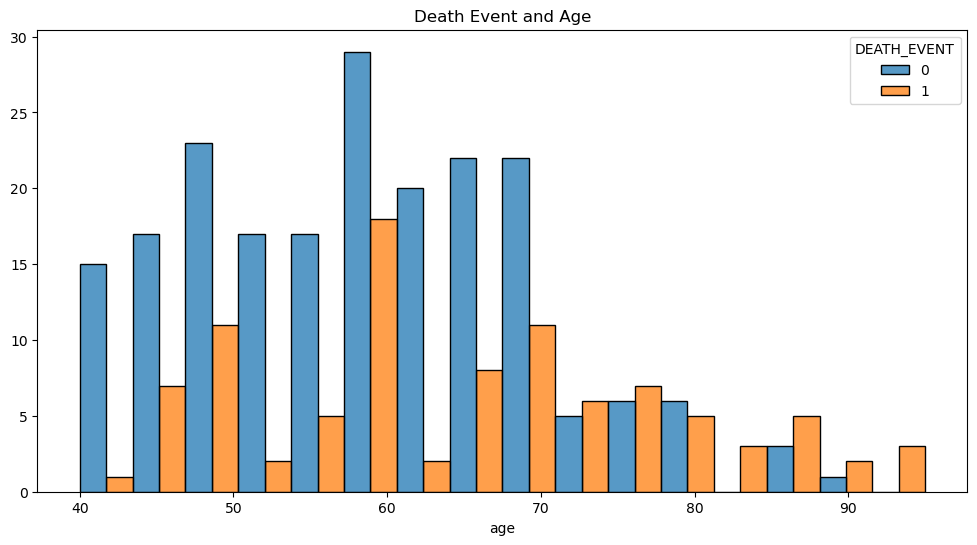

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='age', hue='DEATH_EVENT', multiple='dodge', bins=16)
plt.title('Death Event and Age')
plt.ylabel(None)
plt.show()

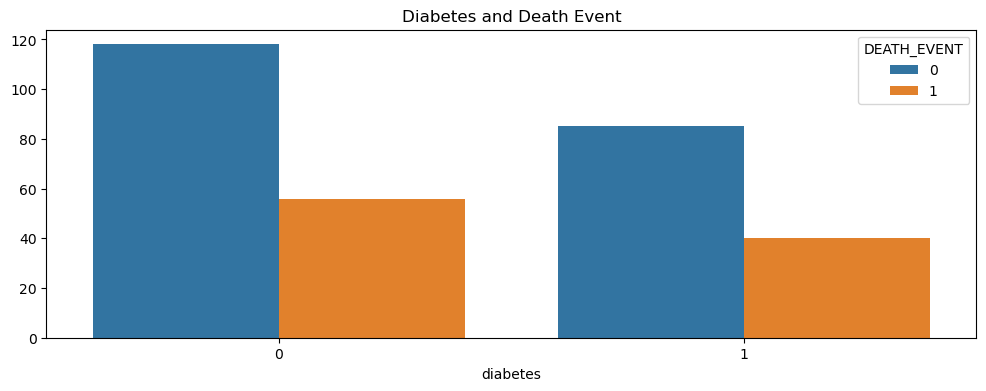

In [33]:
plt.figure(figsize=(12,4))
sns.countplot(data=data, x='diabetes', hue='DEATH_EVENT')
plt.title('Diabetes and Death Event')
plt.ylabel(None)
plt.show()

In [12]:
plt.figure(figsize=(10,15))

cardinality = (pd.Series({feature: len(data[feature].unique()) for feature in data[features]}) .reset_index().rename(columns={'index': 'Feature', 0: 'Cardinality'}))
print(cardinality)


                     Feature  Cardinality
0                        age           47
1                    anaemia            2
2   creatinine_phosphokinase          208
3                   diabetes            2
4          ejection_fraction           17
5        high_blood_pressure            2
6                  platelets          176
7           serum_creatinine           40
8               serum_sodium           27
9                        sex            2
10                   smoking            2
11                      time          148


<Figure size 1000x1500 with 0 Axes>

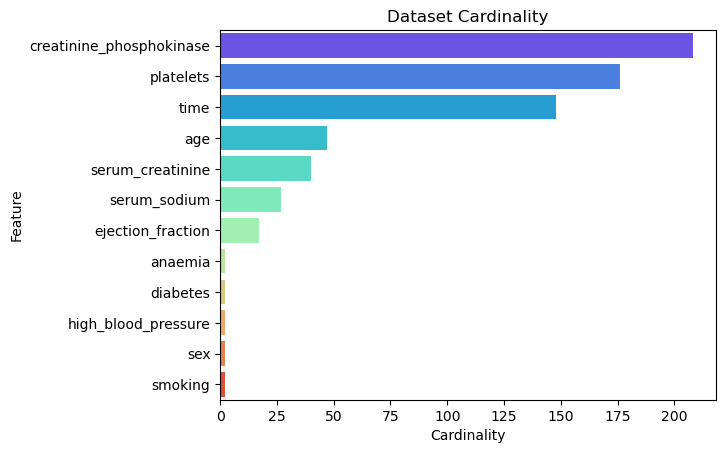

In [13]:
plot=sns.barplot(data=cardinality.sort_values(by='Cardinality',
                                             ascending=False),
                                             x= 'Cardinality',
                                             y = 'Feature',
                                             palette = "rainbow") #"palette" refers to a collection of colors that are used to represent
                                                                  # different data categories or levels in a plot or chart. 
plt.title("Dataset Cardinality")
plt.show()

 

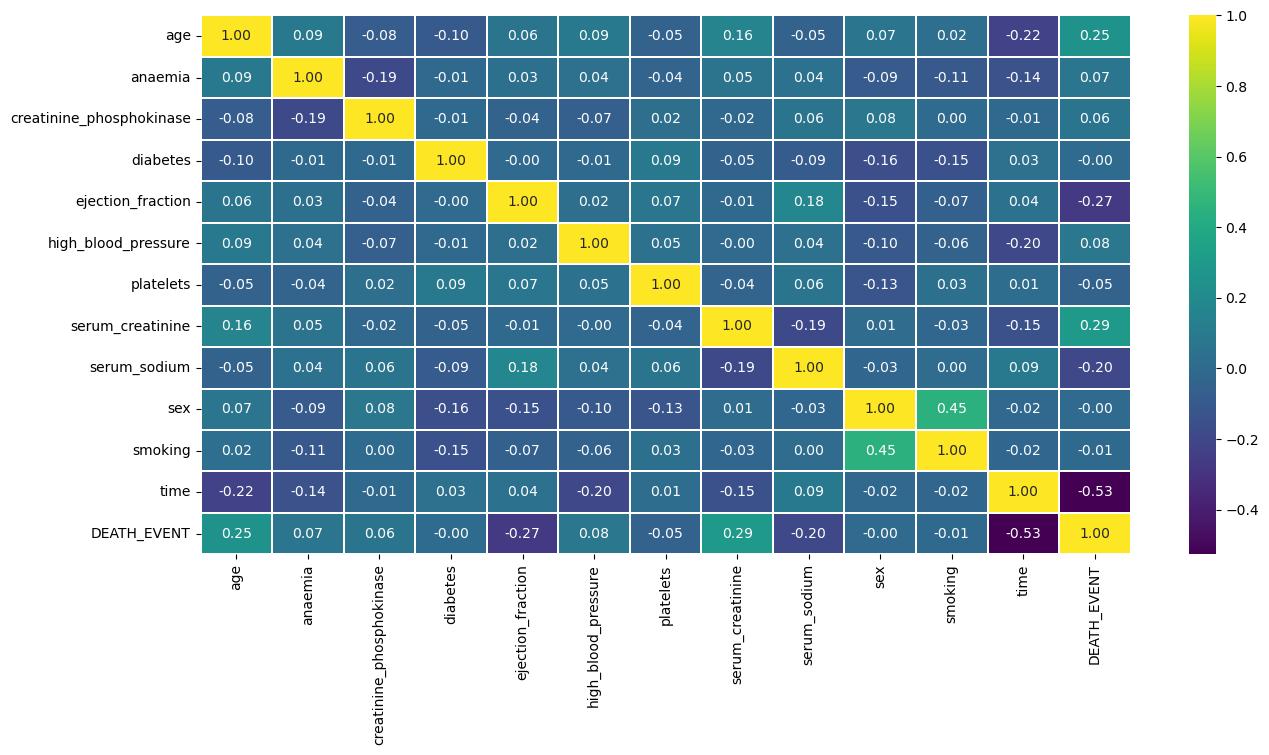

In [14]:
f, ax = plt.subplots(figsize=(15,7))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.3, cmap='viridis', ax=ax)
plt.show()

# Logistic Regression model

In [15]:
# split dataset
X = data[features]        #features
y = data['DEATH_EVENT']   #Target Variable

In [16]:
X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [17]:
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [18]:
# for spliting data in train and test set
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)
 

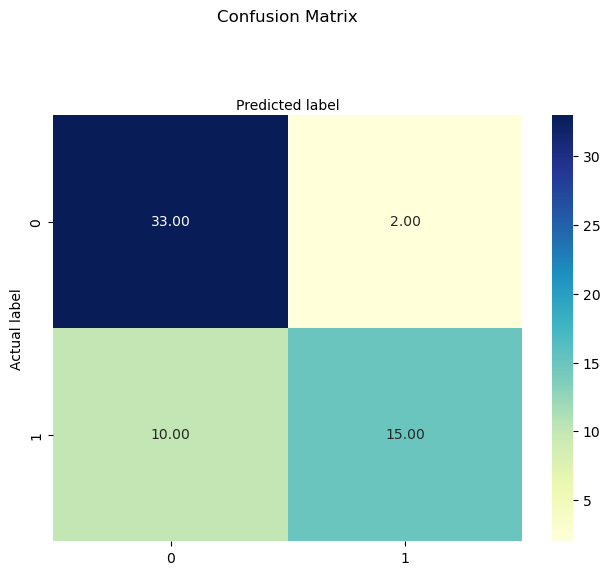

In [21]:
# metrirs
from sklearn import metrics

con_mtx = metrics.confusion_matrix(y_test,y_pred)

class_name = [0,1]    # name of classes : failure or not
fig, ax = plt.subplots()
ticks_marks = np.arange(len(class_name))
plt.xticks(ticks_marks, class_name)
plt.yticks(ticks_marks, class_name)

#Heatmap
sns.heatmap(pd.DataFrame(con_mtx), annot=True, cmap="YlGnBu", fmt='.2f')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.2)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [22]:
from sklearn.metrics import classification_report
target_name = ['normal death','due_heart_failure']
print(classification_report(y_test, y_pred, target_names = target_name ))

# precision  = TP/TP+FP
# Recall = TP / (TP + FN) 
# F1-score = 2 * (precision * recall) / (precision + recall)
# Support is the number of samples in each class, i.e., the number of instances that belong to each class in the test set.

                   precision    recall  f1-score   support

     normal death       0.77      0.94      0.85        35
due_heart_failure       0.88      0.60      0.71        25

         accuracy                           0.80        60
        macro avg       0.82      0.77      0.78        60
     weighted avg       0.82      0.80      0.79        60



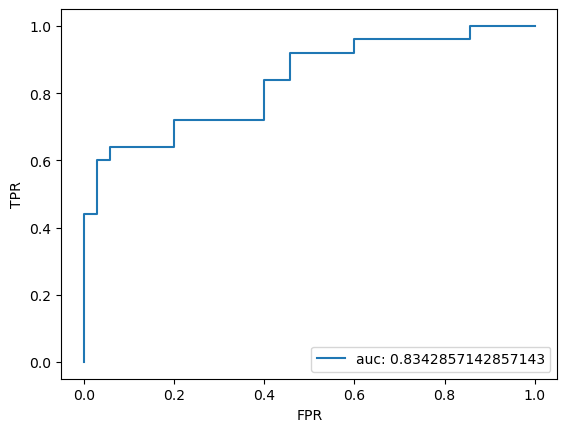

In [23]:
y_pred_prob = LR.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='auc: '+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

In [24]:
y_pred_prob = LR.predict_proba(X_test)[::, 1]        # Classes[0, 1] -> class 1
y_pred_prob

array([0.03849141, 0.01284256, 0.15093946, 0.8989907 , 0.17508671,
       0.0203291 , 0.59515448, 0.10137484, 0.93604487, 0.23747807,
       0.18246465, 0.12696755, 0.17253676, 0.31148532, 0.50145078,
       0.63145521, 0.09596461, 0.37972598, 0.28641203, 0.53252293,
       0.41277541, 0.18576177, 0.10339841, 0.68727484, 0.67885762,
       0.00663816, 0.0390251 , 0.09101514, 0.0461096 , 0.04537511,
       0.84764776, 0.01811635, 0.60634265, 0.89398776, 0.45067315,
       0.30681956, 0.15094056, 0.11575494, 0.31301219, 0.04529786,
       0.71276501, 0.62183973, 0.13130463, 0.20643707, 0.24262711,
       0.13331135, 0.28164729, 0.0274978 , 0.04163189, 0.04000443,
       0.60169641, 0.02593973, 0.57608019, 0.01386192, 0.04918957,
       0.33563884, 0.02695012, 0.88544903, 0.04198657, 0.86623698])

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print("Accuracy: {:.2f}%".format(accuracy_percent))

Accuracy: 80.00%


# SVM

In [26]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train,y_train)

y_pred2=svc.predict(X_test)
y_pred2

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
ac1=accuracy_score(y_test,y_pred2)*100
ac1

75.0